# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 
  

In [8]:
print(maternal_health_risk.metadata)

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

In [7]:
print(maternal_health_risk.variables)

          name     role         type demographic  \
0          Age  Feature      Integer         Age   
1   SystolicBP  Feature      Integer        None   
2  DiastolicBP  Feature      Integer        None   
3           BS  Feature      Integer        None   
4     BodyTemp  Feature      Integer        None   
5    HeartRate  Feature      Integer        None   
6    RiskLevel   Target  Categorical        None   

                                         description   units missing_values  
0    Any ages in years when a women during pregnant.    None             no  
1  Upper value of Blood Pressure in mmHg, another...    None             no  
2  Lower value of Blood Pressure in mmHg, another...    None             no  
3  Blood glucose levels is in terms of a molar co...  mmol/L             no  
4                                               None       F             no  
5                        A normal resting heart rate     bpm             no  
6  Predicted Risk Intensity Level dur

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Fetch the dataset
maternal_health_risk = fetch_ucirepo(id=863)

# Print metadata and variable information
print(maternal_health_risk.metadata)

# Convert data to pandas dataframes
X = pd.DataFrame(maternal_health_risk.data.features, columns=maternal_health_risk.metadata.feature_names)
y = pd.DataFrame(maternal_health_risk.data.targets, columns=maternal_health_risk.metadata.target_names)

# Encode the target variable
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(y.squeeze()), columns=y.columns)

# Handle missing values (replace with the median for numerical features)
X = X.fillna(X.median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

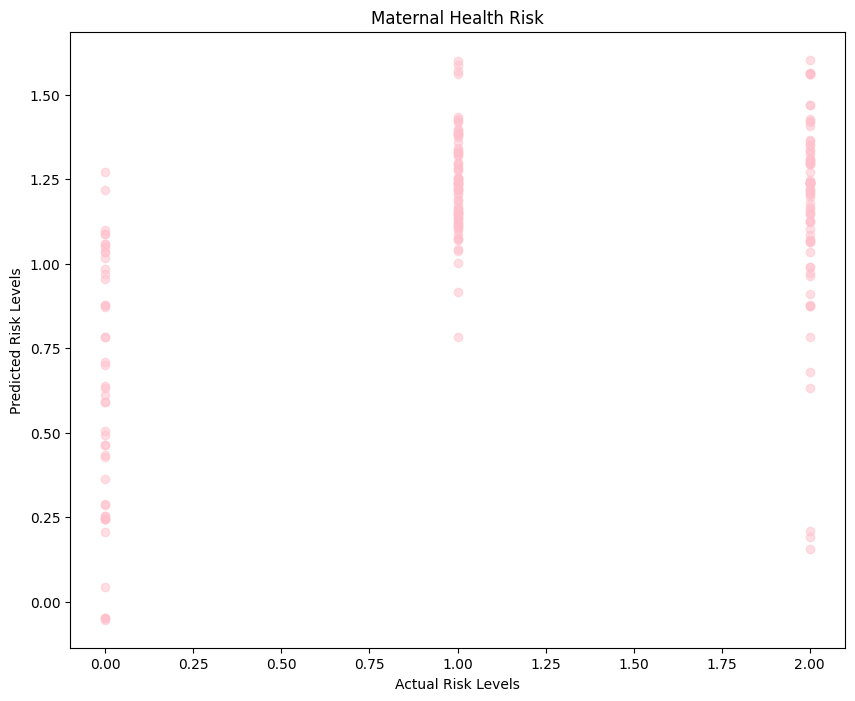

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='pink', alpha=0.5)
plt.title('Maternal Health Risk')
plt.xlabel('Actual Risk Levels')
plt.ylabel('Predicted Risk Levels')

plt.show()